In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../../data/FootWare_Sales_Dataset/FootWare_Wholesale_Sales_Dataset.csv')
# Hiển thị 5 dòng đầu tiên để kiểm tra
df.head()

,Date,Product,Brand,Size,Quantity Sold,Unit Price (₹),Margin (%),Profit (₹),Net Profit (₹),Total Revenue (₹),Tax (GST % ),Tax Amount (₹),Net Tax (₹),Dealer,Stock Availability,Dealer Location
0,01-01-2023,Sneakers,Nike,10,27,5938.70,15%,890.81,24051.87,136293.03,12%,712.64,19241.28,Dealer_2,1,Delhi
1,01-01-2023,Flats,Paragon,9,15,1976.23,40%,790.49,11857.35,17786.10,12%,237.15,3557.25,Dealer_1,57,Delhi
2,01-01-2023,Sneakers,Adidas,7,42,6816.15,15%,1022.42,42941.64,243336.66,12%,817.94,34353.48,Dealer_6,100,Pune
3,01-01-2023,Flats,Paragon,10,44,1548.80,40%,619.52,27258.88,40888.32,12%,185.86,8177.84,Dealer_4,200,Haryana
4,01-01-2023,Sandals,Nike,11,20,11377.67,15%,1706.65,34133.00,193420.40,12%,1365.32,27306.40,Dealer_3,121,Mumbai


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3054 non-null   object 
 1   Product             3054 non-null   object 
 2   Brand               3054 non-null   object 
 3   Size                3054 non-null   int64  
 4   Quantity Sold       3054 non-null   int64  
 5   Unit Price (₹)      3054 non-null   float64
 6   Margin (%)          3054 non-null   object 
 7   Profit (₹)          3054 non-null   float64
 8   Net Profit (₹)      3054 non-null   float64
 9   Total Revenue (₹)   3054 non-null   float64
 10  Tax (GST % )        3054 non-null   object 
 11  Tax Amount (₹)      3054 non-null   float64
 12  Net Tax (₹)         3054 non-null   float64
 13  Dealer              3054 non-null   object 
 14  Stock Availability  3054 non-null   int64  
 15  Dealer Location     3054 non-null   object 
dtypes: flo

In [23]:
df.describe()

,Size,Quantity Sold,Unit Price (₹),Profit (₹),Net Profit (₹),Total Revenue (₹),Tax Amount (₹),Net Tax (₹),Stock Availability
count,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.00000,3054.000000,3054.000000,3054.000000
mean,8.234447,29.998035,4128.839096,904.616126,27196.169604,96816.97480,495.460619,14881.575799,123.886379
std,1.362083,11.789645,3166.109405,421.745479,17282.673094,97753.94543,379.933106,13517.017779,44.952235
min,6.000000,10.000000,502.170000,200.870000,2412.000000,3618.00000,60.260000,723.600000,1.000000
25%,7.000000,20.000000,1885.262500,574.685000,13936.645000,29920.90500,226.230000,5512.857500,86.000000
50%,8.000000,30.000000,2961.470000,859.290000,23268.755000,61263.19000,355.375000,10579.160000,124.000000
75%,9.000000,40.000000,5398.380000,1166.025000,36885.170000,125427.82500,647.807500,19236.960000,162.000000
max,11.000000,50.000000,14948.330000,2242.250000,108368.890000,614090.54000,1793.800000,86695.210000,200.000000


In [24]:
# Loại bỏ dấu % và chuyển đổi Margin (%) và Tax (GST %) sang float
df['Margin (%)'] = df['Margin (%)'].str.replace('%', '').astype(float)
df['Tax (GST % )'] = df['Tax (GST % )'].str.replace('%', '').astype(float)

# Chuyển đổi cột Date sang datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
df.dtypes


Date                  datetime64[ns]
Product                       object
Brand                         object
Size                           int64
Quantity Sold                  int64
Unit Price (₹)               float64
Margin (%)                   float64
Profit (₹)                   float64
Net Profit (₹)               float64
Total Revenue (₹)            float64
Tax (GST % )                 float64
Tax Amount (₹)               float64
Net Tax (₹)                  float64
Dealer                        object
Stock Availability             int64
Dealer Location               object
dtype: object

In [25]:
# Kiểm tra số dòng trùng lặp hoàn toàn
duplicate_rows = df.duplicated().sum()
print(f"Số dòng bị trùng lặp hoàn toàn: {duplicate_rows}")


Số dòng bị trùng lặp hoàn toàn: 0


In [26]:
# Kiểm tra lại giá trị null
print(df.isnull().sum())

# Kiểm tra các giá trị nhỏ hơn 0 ở các cột số (không hợp lệ cho bán hàng)
num_cols = ['Size', 'Quantity Sold', 'Unit Price (₹)', 'Margin (%)', 
            'Profit (₹)', 'Net Profit (₹)', 'Total Revenue (₹)', 
            'Tax (GST % )', 'Tax Amount (₹)', 'Net Tax (₹)', 'Stock Availability']

for col in num_cols:
    print(f"{col}: Số lượng giá trị < 0: {(df[col] < 0).sum()}")


Date                  0
Product               0
Brand                 0
Size                  0
Quantity Sold         0
Unit Price (₹)        0
Margin (%)            0
Profit (₹)            0
Net Profit (₹)        0
Total Revenue (₹)     0
Tax (GST % )          0
Tax Amount (₹)        0
Net Tax (₹)           0
Dealer                0
Stock Availability    0
Dealer Location       0
dtype: int64
Size: Số lượng giá trị < 0: 0
Quantity Sold: Số lượng giá trị < 0: 0
Unit Price (₹): Số lượng giá trị < 0: 0
Margin (%): Số lượng giá trị < 0: 0
Profit (₹): Số lượng giá trị < 0: 0
Net Profit (₹): Số lượng giá trị < 0: 0
Total Revenue (₹): Số lượng giá trị < 0: 0
Tax (GST % ): Số lượng giá trị < 0: 0
Tax Amount (₹): Số lượng giá trị < 0: 0
Net Tax (₹): Số lượng giá trị < 0: 0
Stock Availability: Số lượng giá trị < 0: 0


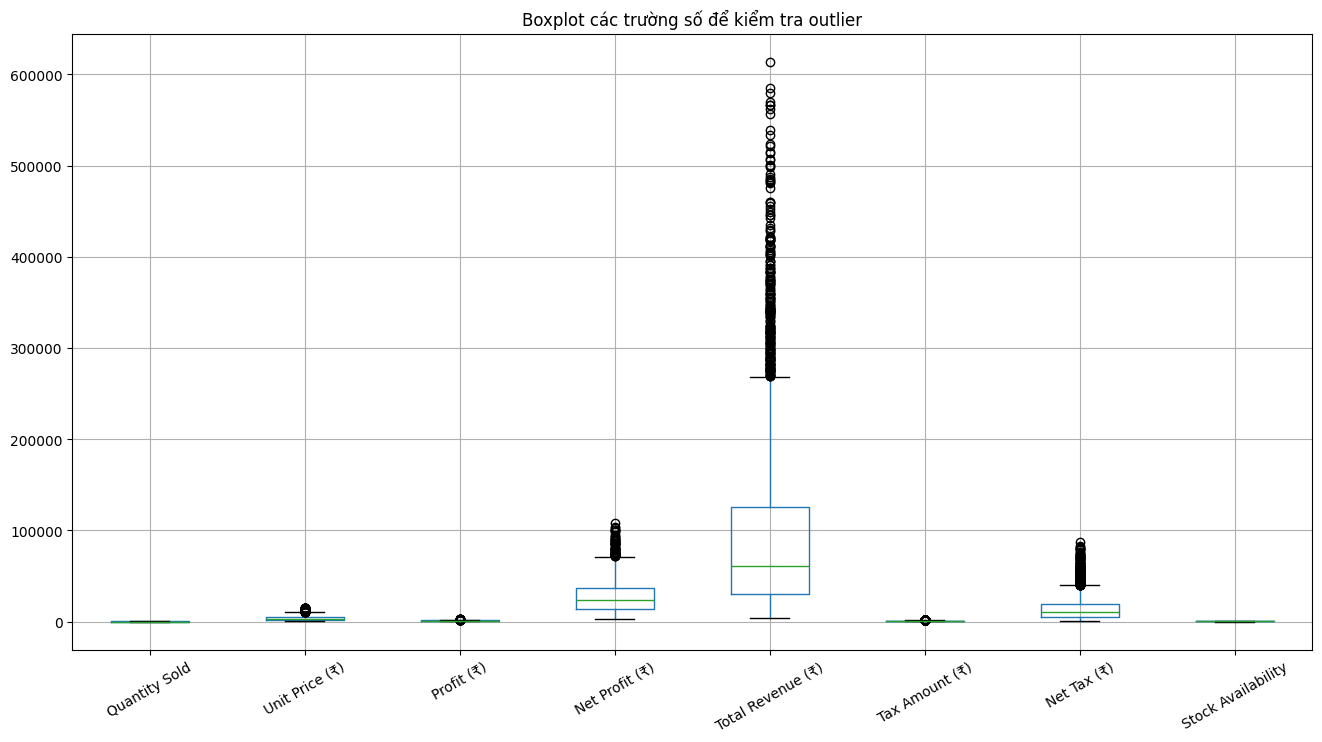

In [27]:
# Thống kê mô tả cơ bản cho các trường số
df.describe()

# Vẽ boxplot để kiểm tra ngoại lai cho từng trường số
import matplotlib.pyplot as plt
num_cols = ['Quantity Sold', 'Unit Price (₹)', 'Profit (₹)', 'Net Profit (₹)',
            'Total Revenue (₹)', 'Tax Amount (₹)', 'Net Tax (₹)', 'Stock Availability']

plt.figure(figsize=(16, 8))
df[num_cols].boxplot()
plt.xticks(rotation=30)
plt.title('Boxplot các trường số để kiểm tra outlier')
plt.show()


In [28]:
def outlier_summary(df, cols):
    result = []
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        count_outliers = outliers.count()
        percent_outliers = 100 * count_outliers / len(df)
        result.append((col, count_outliers, percent_outliers))
    return result

num_cols = [
    'Quantity Sold', 'Unit Price (₹)', 'Profit (₹)', 'Net Profit (₹)',
    'Total Revenue (₹)', 'Tax Amount (₹)', 'Net Tax (₹)', 'Stock Availability'
]

outlier_stats = outlier_summary(df, num_cols)

# In kết quả
for col, count, pct in outlier_stats:
    print(f"{col}: {count} giá trị ngoại lai ({pct:.2f}%)")


Quantity Sold: 0 giá trị ngoại lai (0.00%)
Unit Price (₹): 167 giá trị ngoại lai (5.47%)
Profit (₹): 50 giá trị ngoại lai (1.64%)
Net Profit (₹): 61 giá trị ngoại lai (2.00%)
Total Revenue (₹): 226 giá trị ngoại lai (7.40%)
Tax Amount (₹): 167 giá trị ngoại lai (5.47%)
Net Tax (₹): 206 giá trị ngoại lai (6.75%)
Stock Availability: 0 giá trị ngoại lai (0.00%)


In [29]:
# Thống kê mô tả tổng quan
stats = df.describe()
print(stats)

# Thống kê thêm các percentiles đặc biệt (1%, 99%) để nhìn rõ outlier
percentiles = df.describe(percentiles=[.01, .25, .5, .75, .99])
print(percentiles)


                                Date         Size  Quantity Sold  \
count                           3054  3054.000000    3054.000000   
mean   2023-07-03 09:08:22.161100288     8.234447      29.998035   
min              2023-01-01 00:00:00     6.000000      10.000000   
25%              2023-04-02 00:00:00     7.000000      20.000000   
50%              2023-07-05 00:00:00     8.000000      30.000000   
75%              2023-10-03 18:00:00     9.000000      40.000000   
max              2024-01-02 00:00:00    11.000000      50.000000   
std                              NaN     1.362083      11.789645   

       Unit Price (₹)   Margin (%)   Profit (₹)  Net Profit (₹)  \
count     3054.000000  3054.000000  3054.000000     3054.000000   
mean      4128.839096    27.694826   904.616126    27196.169604   
min        502.170000    15.000000   200.870000     2412.000000   
25%       1885.262500    15.000000   574.685000    13936.645000   
50%       2961.470000    30.000000   859.290000    2

In [30]:
# Top 10 sản phẩm bán chạy nhất (tổng Quantity Sold)
print("Top 10 sản phẩm bán chạy nhất:")
print(df.groupby('Product')['Quantity Sold'].sum().sort_values(ascending=False).head(10))

# Top 10 thương hiệu bán chạy nhất
print("\nTop 10 thương hiệu bán chạy nhất:")
print(df.groupby('Brand')['Quantity Sold'].sum().sort_values(ascending=False).head(10))

# Top 10 đại lý bán được nhiều hàng nhất
print("\nTop 10 đại lý bán được nhiều nhất:")
print(df.groupby('Dealer')['Quantity Sold'].sum().sort_values(ascending=False).head(10))

# Top 10 khu vực (location) bán tốt nhất
print("\nTop 10 khu vực bán nhiều nhất:")
print(df.groupby('Dealer Location')['Quantity Sold'].sum().sort_values(ascending=False).head(10))


Top 10 sản phẩm bán chạy nhất:
Product
Flats       32403
Sandals     26276
Sneakers    19869
Heels        6666
Boots        6400
Name: Quantity Sold, dtype: int64

Top 10 thương hiệu bán chạy nhất:
Brand
Paragon      26622
Bata         17584
Nike         14755
Adidas       11594
Liberty       3833
Sketchers     3778
Woodland      3541
Reebok        3462
Metro         3388
Puma          3057
Name: Quantity Sold, dtype: int64

Top 10 đại lý bán được nhiều nhất:
Dealer
Dealer_6    23241
Dealer_2    20260
Dealer_3    14410
Dealer_7    12144
Dealer_1    10121
Dealer_4     7311
Dealer_5     4127
Name: Quantity Sold, dtype: int64

Top 10 khu vực bán nhiều nhất:
Dealer Location
Delhi      30381
Mumbai     26554
Pune       23241
Haryana    11438
Name: Quantity Sold, dtype: int64


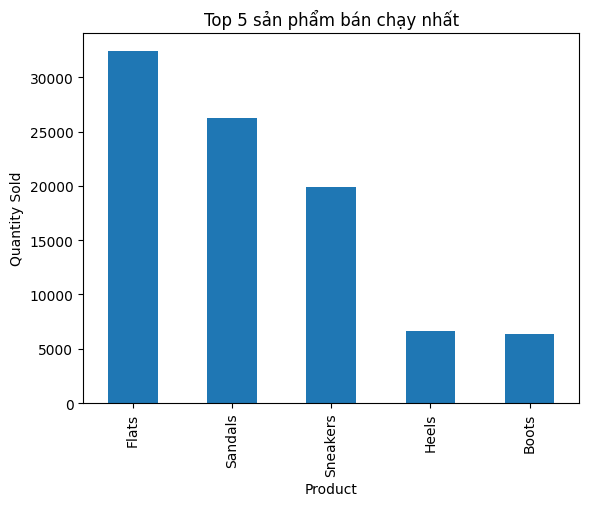

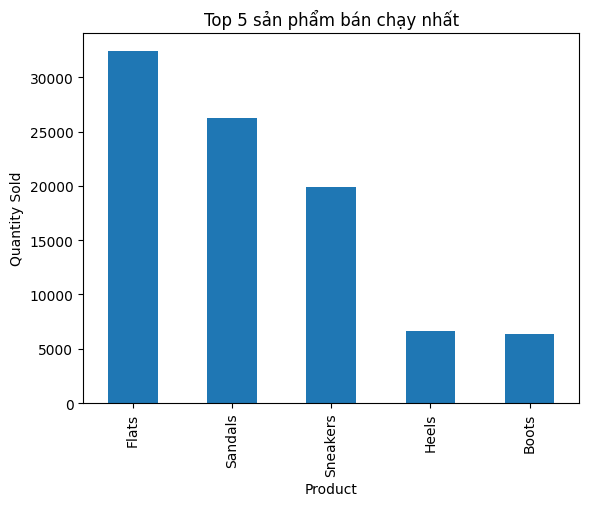

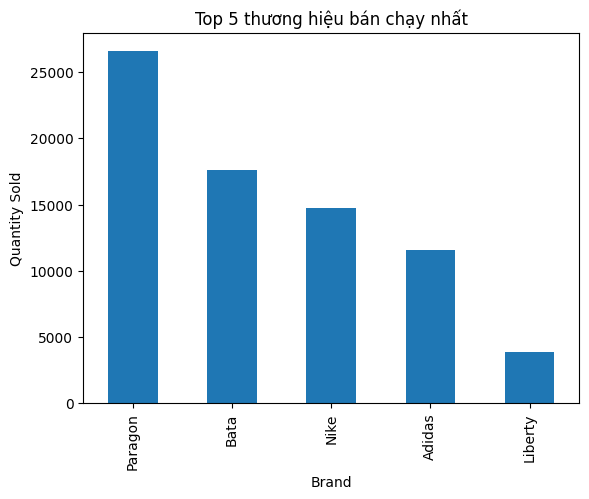

In [31]:
import matplotlib.pyplot as plt

# Vẽ barplot top 5 sản phẩm bán chạy nhất
top_product = df.groupby('Product')['Quantity Sold'].sum().sort_values(ascending=False).head(5)
top_product.plot(kind='bar', title='Top 5 sản phẩm bán chạy nhất')
plt.ylabel('Quantity Sold')
plt.show()

# Vẽ barplot top 5 thương hiệu
top_brand = df.groupby('Brand')['Quantity Sold'].sum().sort_values(ascending=False).head(5)
top_brand.plot(kind='bar', title='Top 5 thương hiệu bán chạy nhất')
plt.ylabel('Quantity Sold')
plt.show()


In [32]:
# Tổng hợp doanh thu và lợi nhuận theo ngày
daily_stats = df.groupby('Date')[['Total Revenue (₹)', 'Net Profit (₹)']].sum().reset_index()

# Xem trước vài dòng đầu
print(daily_stats.head())


        Date  Total Revenue (₹)  Net Profit (₹)
0 2023-01-01         1405583.19       360437.53
1 2023-01-02          264062.35       134310.29
2 2023-01-03         1784620.65       361266.54
3 2023-01-04          526197.05       165116.14
4 2023-01-05          305670.22        82481.60


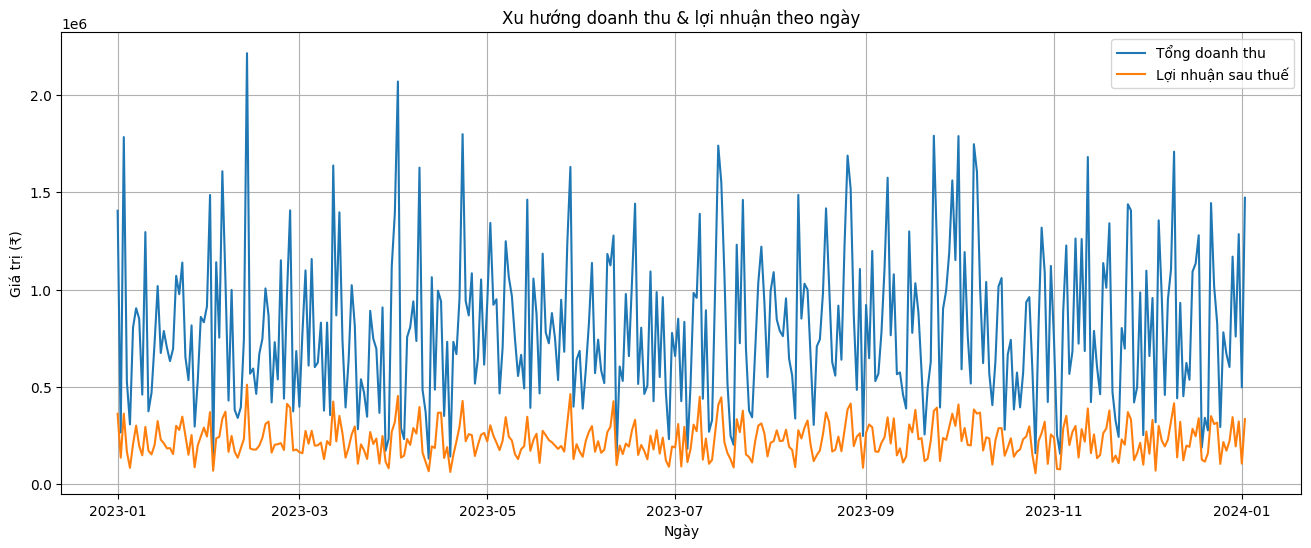

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(daily_stats['Date'], daily_stats['Total Revenue (₹)'], label='Tổng doanh thu')
plt.plot(daily_stats['Date'], daily_stats['Net Profit (₹)'], label='Lợi nhuận sau thuế')
plt.title('Xu hướng doanh thu & lợi nhuận theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Giá trị (₹)')
plt.legend()
plt.grid(True)
plt.show()


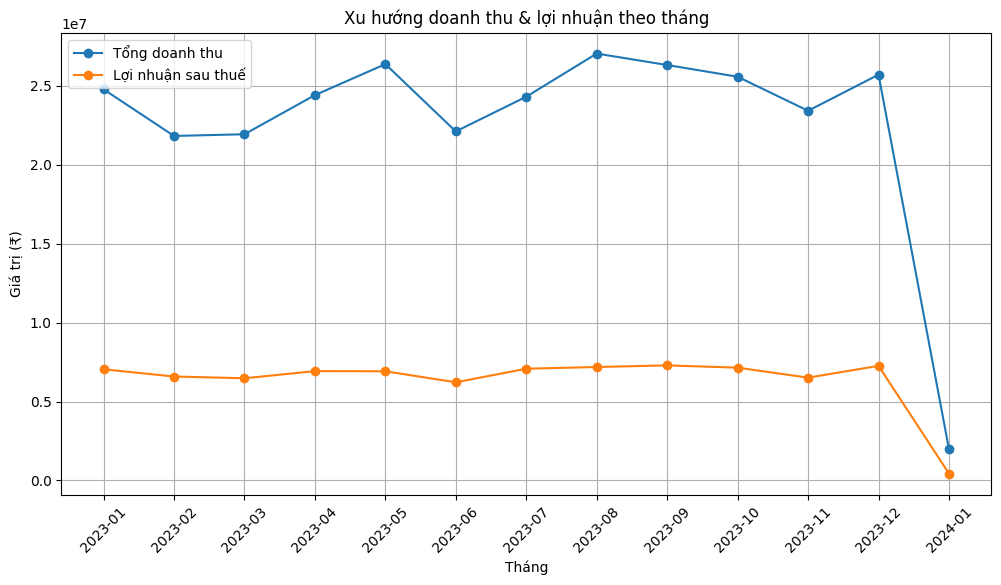

In [34]:
# Thêm cột tháng-năm
df['Month'] = df['Date'].dt.to_period('M')

# Tổng hợp doanh thu và lợi nhuận theo tháng
monthly_stats = df.groupby('Month')[['Total Revenue (₹)', 'Net Profit (₹)']].sum().reset_index()

# Đổi về dạng string để vẽ biểu đồ
monthly_stats['Month'] = monthly_stats['Month'].astype(str)

# Vẽ biểu đồ theo tháng
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['Month'], monthly_stats['Total Revenue (₹)'], marker='o', label='Tổng doanh thu')
plt.plot(monthly_stats['Month'], monthly_stats['Net Profit (₹)'], marker='o', label='Lợi nhuận sau thuế')
plt.title('Xu hướng doanh thu & lợi nhuận theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Giá trị (₹)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
